In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
Airlines=pd.read_csv("D:\\ExcelR Assignments\\Forecasting\\Airlines+Data.csv")
Airlines

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


<AxesSubplot:>

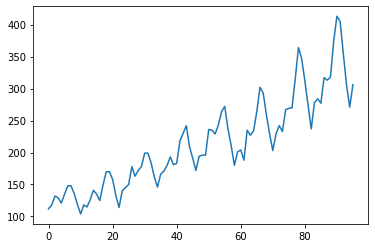

In [32]:
Airlines.Passengers.plot()

In [33]:
Airlines["Date"] = pd.to_datetime(Airlines.Month,format="%b-%y")
Airlines["month"] = Airlines.Date.dt.strftime("%b") 
Airlines["year"] = Airlines.Date.dt.strftime("%Y") 

In [34]:
Airlines.head()

,Month,Passengers,Date,month,year
0,Jan-95,112,1995-01-01,Jan,1995
1,Feb-95,118,1995-02-01,Feb,1995
2,Mar-95,132,1995-03-01,Mar,1995
3,Apr-95,129,1995-04-01,Apr,1995
4,May-95,121,1995-05-01,May,1995


<AxesSubplot:xlabel='month', ylabel='year'>

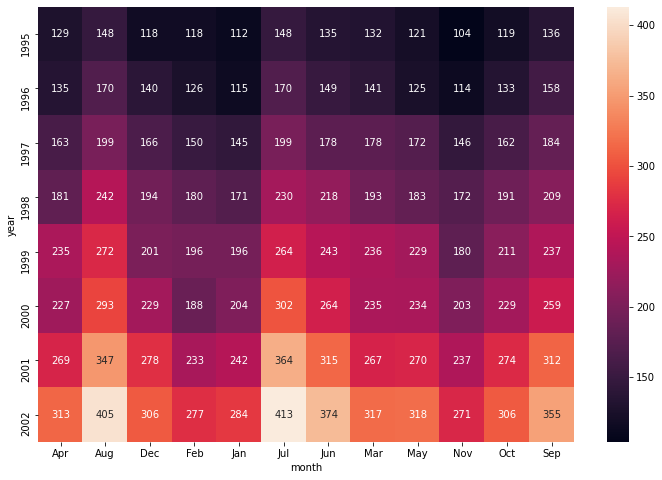

In [35]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Passengers'>

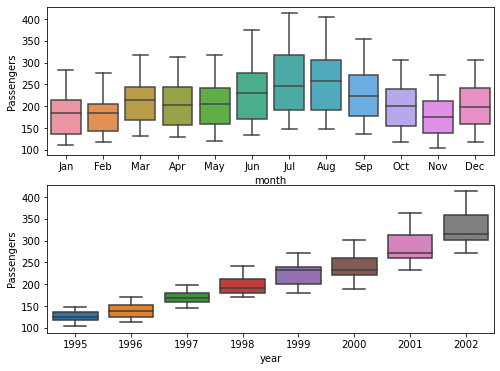

In [36]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=Airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airlines)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

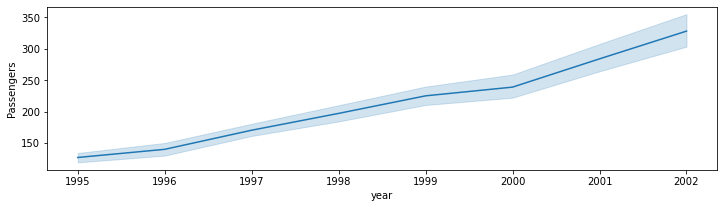

In [37]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Airlines)

In [38]:
Airlines['t']=range(1,97)
Airlines.head()

,Month,Passengers,Date,month,year,t
0,Jan-95,112,1995-01-01,Jan,1995,1
1,Feb-95,118,1995-02-01,Feb,1995,2
2,Mar-95,132,1995-03-01,Mar,1995,3
3,Apr-95,129,1995-04-01,Apr,1995,4
4,May-95,121,1995-05-01,May,1995,5


In [39]:
Airlines['t_sqrd']=Airlines.t*Airlines.t
Airlines.head()

,Month,Passengers,Date,month,year,t,t_sqrd
0,Jan-95,112,1995-01-01,Jan,1995,1,1
1,Feb-95,118,1995-02-01,Feb,1995,2,4
2,Mar-95,132,1995-03-01,Mar,1995,3,9
3,Apr-95,129,1995-04-01,Apr,1995,4,16
4,May-95,121,1995-05-01,May,1995,5,25


In [40]:
Airlines.head()

,Month,Passengers,Date,month,year,t,t_sqrd
0,Jan-95,112,1995-01-01,Jan,1995,1,1
1,Feb-95,118,1995-02-01,Feb,1995,2,4
2,Mar-95,132,1995-03-01,Mar,1995,3,9
3,Apr-95,129,1995-04-01,Apr,1995,4,16
4,May-95,121,1995-05-01,May,1995,5,25


In [41]:
Airlines['log_Psngr']=np.log(Airlines.Passengers)
Airlines.head()

,Month,Passengers,Date,month,year,t,t_sqrd,log_Psngr
0,Jan-95,112,1995-01-01,Jan,1995,1,1,4.718499
1,Feb-95,118,1995-02-01,Feb,1995,2,4,4.770685
2,Mar-95,132,1995-03-01,Mar,1995,3,9,4.882802
3,Apr-95,129,1995-04-01,Apr,1995,4,16,4.859812
4,May-95,121,1995-05-01,May,1995,5,25,4.795791


In [50]:
months=pd.get_dummies(Airlines['month'])
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [51]:
months=months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [52]:
Airlines=pd.concat([Airlines,months],axis=1)
Airlines.head()

,Month,Passengers,Date,month,year,t,t_sqrd,log_Psngr,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-95,112,1995-01-01,Jan,1995,1,1,4.718499,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-95,118,1995-02-01,Feb,1995,2,4,4.770685,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-95,132,1995-03-01,Mar,1995,3,9,4.882802,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-95,129,1995-04-01,Apr,1995,4,16,4.859812,0,0,0,1,0,0,0,0,0,0,0,0
4,May-95,121,1995-05-01,May,1995,5,25,4.795791,0,0,0,0,1,0,0,0,0,0,0,0


In [53]:
Train = Airlines.head(80)
Test = Airlines.tail(16)

In [54]:
Test

,Month,Passengers,Date,month,year,t,t_sqrd,log_Psngr,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
80,Sep-01,312,2001-09-01,Sep,2001,81,6561,5.743003,0,0,0,0,0,0,0,0,1,0,0,0
81,Oct-01,274,2001-10-01,Oct,2001,82,6724,5.613128,0,0,0,0,0,0,0,0,0,1,0,0
82,Nov-01,237,2001-11-01,Nov,2001,83,6889,5.468060,0,0,0,0,0,0,0,0,0,0,1,0
83,Dec-01,278,2001-12-01,Dec,2001,84,7056,5.627621,0,0,0,0,0,0,0,0,0,0,0,1
84,Jan-02,284,2002-01-01,Jan,2002,85,7225,5.648974,1,0,0,0,0,0,0,0,0,0,0,0
85,Feb-02,277,2002-02-01,Feb,2002,86,7396,5.624018,0,1,0,0,0,0,0,0,0,0,0,0
86,Mar-02,317,2002-03-01,Mar,2002,87,7569,5.758902,0,0,1,0,0,0,0,0,0,0,0,0
87,Apr-02,313,2002-04-01,Apr,2002,88,7744,5.746203,0,0,0,1,0,0,0,0,0,0,0,0
88,May-02,318,2002-05-01,May,2002,89,7921,5.762051,0,0,0,0,1,0,0,0,0,0,0,0
89,Jun-02,374,2002-06-01,Jun,2002,90,8100,5.924256,0,0,0,0,0,1,0,0,0,0,0,0


In [55]:
#Linear model

In [56]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.542624067726784

In [57]:
#Exponential

Exp = smf.ols('log_Psngr~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


43.79373939334305

In [58]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sqrd',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sqrd"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.654403695842056

In [59]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.26647641443307

In [61]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_sqrd+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sqrd']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.910983570104857

In [62]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Psngr~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621084

In [63]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Psngr~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

9.46900023030376

In [64]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,9.469000
4,rmse_add_sea_quad,23.910984
2,rmse_Quad,43.654404
1,rmse_Exp,43.793739
0,rmse_linear,47.542624
3,rmse_add_sea,129.266476
5,rmse_Mult_sea,135.326484


Multiplicative Additive Seasonality model is the best model.